# ECON1611 - Assessment 2: Empirical Project in Python (Individual)

In [1]:
# Module imports
# import modules for use below
# (Note: Modules specific to particular machine learning examples are imported in the relevant code block)
# 'as' allows use of an abbreviated module name
import matplotlib.pyplot as plt     # Matplotlib for low-level plot details
import numpy as np                  # NumPy for fast numeric operations
import pandas as pd                 # Pandas for datasets
import seaborn as sns               # Seaborn for easier plotting

In [2]:
# set a random number generator seed to allow reproducibility
seed = 12345

In [ ]:
from google.colab import files  # uncomment if using colab
uploades = files.upload()  # uncomment if using colab

In [3]:
# Read the data into a pandas dataframe for futher analysis
df = pd.read_csv('./bank-additional.csv', sep=';')

In [4]:
# View the first few rows to check all looks normal
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data Cleaning
Often the data provided is not in the final form we want to work with. Data cleaning refers to the process whereby we transform the initial data into the final form we want/need to work with.
The following steps do not form part of the assessment, but are a demonstration of some of the steps which may be involved in data cleaning.
In the following example this process includes:
- Removing unneeded data
- Transforming data - in this case, transforming categorical data into binary data (one hot encoding) 

**Notes:**

_-When working with Pandas axis=0 means a row operation and axis=1 means a column operation._

_-The a subset of columns can be selected by creating a list of names e.g. ['var1', 'var2']._

### Remove unneeded data
Unneeded data unnecessarily complicates the machine learning pipeline. Here we drop entire columns which are unneeded

In [5]:
# Note - `inplace=True` affects the current dataframe directly
#  - otherwise we would need to assign the returned dataframe to a new variable
df.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', ], axis=1, inplace=True)

### Encode data
Data encoding, or transformation, involves changing the form of the data

**Note:**

_sklearn has it's own perprocessing classes (e.g. LabelBinarizer, OneHotEncoder) which can be used as part of a data processing pipeline to do this. For the sake of those unfamiliar with data processing in Python we have used simpler pandas methods here._

#### Binary Variables

In [6]:
# `y` is currently a text column - encode all 'yes' values as `1`, everything else as `0` 
# and store in a column named 'y_encoded' (this will be our final target array)
df['y_encoded'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df.head(n=20)

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


In [7]:
# Now repeat for other columns using this encoding
# creating dummy for default or not
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [8]:
# create a binary indicator for whether person was contacted or not in marketing campaign 
# (pdays = 999 if they weren't contacted at all)
df['treated'] = df['pdays'].apply(lambda row: 0 if row == 999 else 1)
df[['treated', 'pdays']].head()

,treated,pdays
0,0,999
1,0,999
2,0,999
3,0,999
4,0,999


#### Nominal data
Nominal data is data with generally several categories, and for which there is no 'innate' ordering of the categories. This kind of data is generally encoded by creating a number of 'dummy' columns containing binary (yes/no) data - one column for each 'category' in the original data

In [9]:
# the 'marital' column is nominal data - there are several different categories, for which ordering doesn't make sense
# we will use the pandas 'get_dummies' method to create a different binary column for each status
# NOTE: This will create several columns named 'marital_...' for each category
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')

# view the 'new' and original columns
pd.concat([df['marital'], marital_dummies], axis=1).head()

,marital,marital_divorced,marital_married,marital_single,marital_unknown
0,married,0,1,0,0
1,single,0,0,1,0
2,married,0,1,0,0
3,married,0,1,0,0
4,married,0,1,0,0


In [10]:
# now drop the new 'marital_unknown' variable
marital_dummies.drop('marital_unknown', axis=1, inplace=True)
# merge new dummies into main dataframe
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,...,nr.employed,y,y_encoded,is_default,is_housing,is_loan,treated,marital_divorced,marital_married,marital_single
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,...,5099.1,no,0,0,1,0,0,0,1,0
1,39,services,single,high.school,no,no,no,999,0,nonexistent,...,5191.0,no,0,0,0,0,0,0,0,1
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,...,5228.1,no,0,0,1,0,0,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,...,5228.1,no,0,0,0,0,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,...,5195.8,no,0,0,1,0,0,0,1,0


In [11]:
# repeat for 'job'
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
X = pd.concat([df, job_dummies], axis=1)

# and 'poutcome'
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

# and 'education'
# Note: Education is a Ordinal value (the categories have an innate order,
# and would usually be encoded using an OrdinalEncoder 
# - for simplicity here we are again using simple binary dummy values)
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,...,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,...,0,1,0,0,0,1,0,0,0,0
1,39,services,single,high.school,no,no,no,999,0,nonexistent,...,0,1,0,0,0,0,1,0,0,0
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,...,0,1,0,0,0,0,1,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,...,0,1,0,0,0,1,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,...,0,1,0,0,0,0,0,0,0,1


### Split out our X and Y data
We split the dataset into a target array (here the column currently called `y_encoded`) and a features matrix (all other columns). By convention these are named `X` and `y`

In [12]:
# NOTE: we use `copy` to ensure that `X` and `y` are not simply views into the existing datagrame
y = df['y_encoded'].copy()
X = df.copy()
X.drop(['y_encoded', 'y'], axis=1, inplace=True)

In [13]:
#drop  the 'original' variables (now encoded as other columns)
X.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'pdays', 'poutcome',], axis=1, inplace=True)

In [14]:
# Review the final dataframe
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   previous                       4119 non-null   int64  
 2   emp.var.rate                   4119 non-null   float64
 3   cons.price.idx                 4119 non-null   float64
 4   cons.conf.idx                  4119 non-null   float64
 5   euribor3m                      4119 non-null   float64
 6   nr.employed                    4119 non-null   float64
 7   is_default                     4119 non-null   int64  
 8   is_housing                     4119 non-null   int64  
 9   is_loan                        4119 non-null   int64  
 10  treated                        4119 non-null   int64  
 11  marital_divorced               4119 non-null   uint8  
 12  marital_married                4119 non-null   u

In [15]:
# Review the final target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_encoded
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


## Assignment Questions
### 1) Summarise and describe the data
#### a) Print the first 20 rows of data

In [16]:
X.head(n=20)

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,...,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,30,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,39,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,25,0,1.4,94.465,-41.8,4.962,5228.1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,38,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,47,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5,32,2,-1.1,94.199,-37.5,0.884,4963.6,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,32,0,-1.1,94.199,-37.5,0.879,4963.6,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,41,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,31,1,-0.1,93.200,-42.0,4.153,5195.8,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,35,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


#### b) Describe the data e.g. mean, median, standard deviation of all the variables

In [17]:
X.describe()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,...,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.000243,0.528041,0.161447,...,0.110221,0.855305,0.034474,0.104151,0.055353,0.139354,0.223598,0.000243,0.129886,0.306871
std,10.313362,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.015581,0.499274,0.367987,...,0.313203,0.351836,0.182466,0.305494,0.228696,0.346358,0.416706,0.015581,0.336219,0.461251
min,18.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,88.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### c) Count the number of observations in each response category 

In [18]:
# Count the number of observations in each response category
# NOTE: This is easiest done on the data before encoding
# e.g. marital

# Are there any missing values?
print('Missing values?')
print(df['marital'].isnull().values.any())

# Count of unique values
print('Count of unique values')
print(df['marital'].value_counts())


Missing values?
False
Count of unique values
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64


### 2) Graphing
#### a) Basic scatter plot of two features against each other 

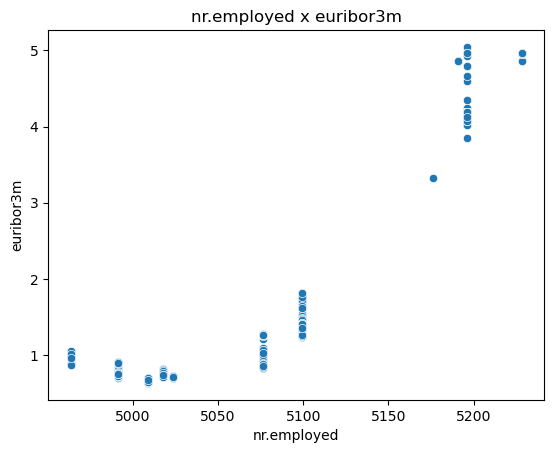

In [19]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=X, x="nr.employed", y="euribor3m")\
       .set(title="nr.employed x euribor3m", xlabel="nr.employed", ylabel="euribor3m")
plt.show()

#### b) Histogram

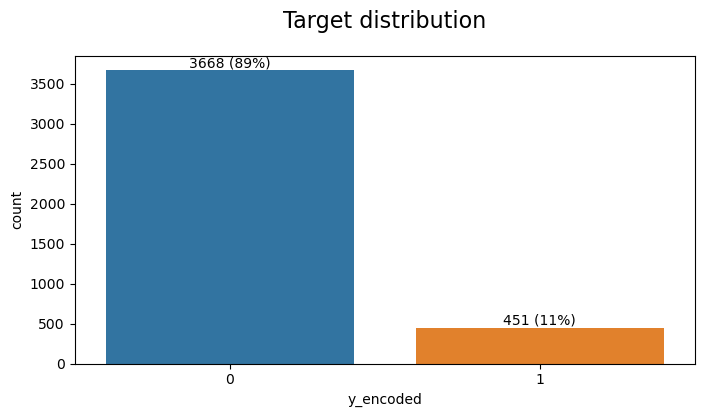

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=y, ax=ax)

abs_vals = y.value_counts()
rel_vals = y.value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.show()

### 3) From the 20 inputs, choose the set of controls you will use for your machine learning models. Justify why you have excluded some variables. Hint: the ones highlighted in yellow are those you may want to exclude: why? (1 mark) 

**Note:**

_Because we are doing this after the data cleaning step, there are now more than 20 inputs - so remember to take account variables which may now have been one-hot encoded into multiple dummy variables_

In [21]:
# uncomment below and choose which columns to exclude
excluded_columns = []
# excluded_columns = ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
#        'euribor3m', 'nr.employed', 'y', 'is_default', 'is_housing', 'is_loan',
#        'treated', 'marital_divorced', 'marital_married', 'marital_single',
#        'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
#        'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
#        'education_high.school', 'education_illiterate',
#        'education_professional.course', 'education_university.degree']

X_final = X.drop(excluded_columns, axis=1)
X_final

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,is_default,is_housing,is_loan,...,poutcome_failure,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,30,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,39,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,25,0,1.4,94.465,-41.8,4.962,5228.1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,38,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,47,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1.4,93.918,-42.7,4.958,5228.1,0,1,1,...,0,1,0,0,1,0,0,0,0,0
4115,39,0,1.4,93.918,-42.7,4.959,5228.1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4116,27,1,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4117,58,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### 4) Build a classification tree in Python
#### a) split sample into train and test  

In [22]:
# Training and Test Data
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Setting random_state means the split will always be the same which sometimes is useful.
X_train, X_test, y_train, y_test =\
    train_test_split(X_final, y, test_size=0.3, random_state=seed)

# Output the dimensions of each of the sets
print(f"X_train is {X_train.shape}")
print(f"X_test is {X_test.shape}")
print(f"y_train is {y_train.shape}")
print(f"y_test is {y_test.shape}")

#why keep getting error "inconsistent number of samples"

X_train is (2883, 24)
X_test is (1236, 24)
y_train is (2883,)
y_test is (1236,)


#### b) Without doing any pruning of the tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Setup a Decision Tree 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=20, min_samples_split=2, random_state=seed)
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

#### c) Draw the tree

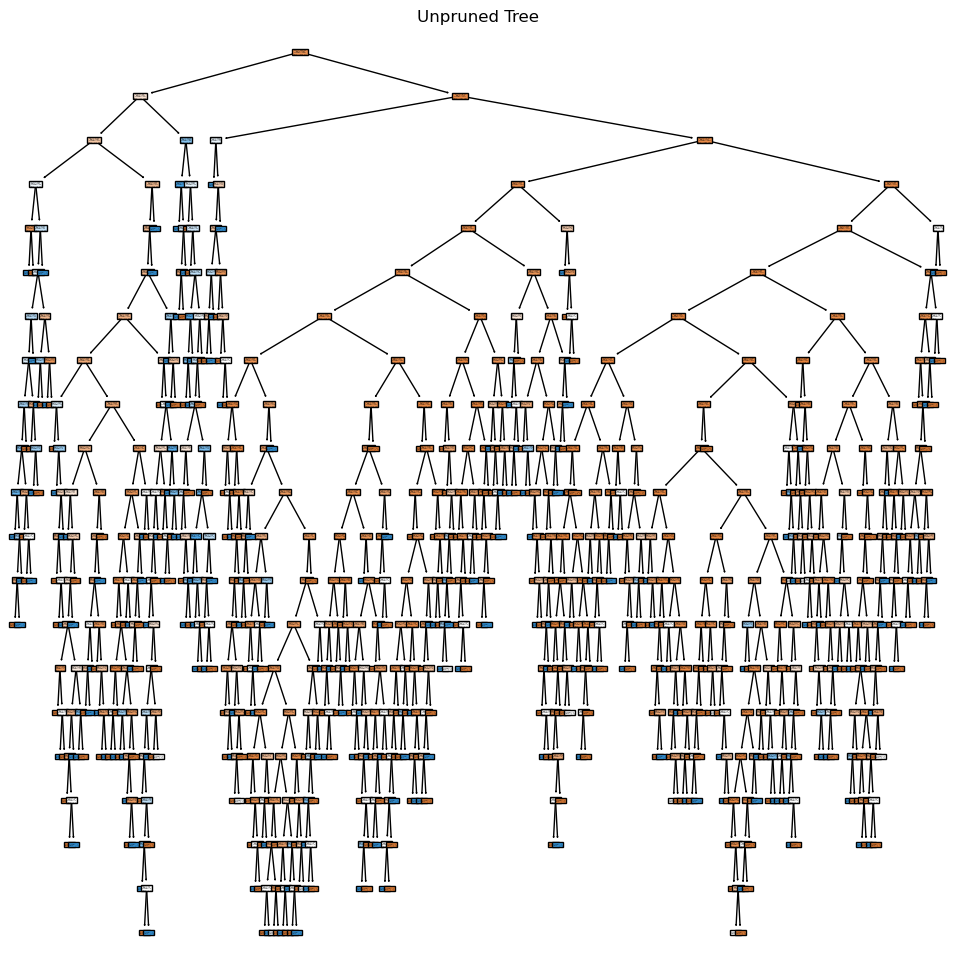

In [24]:
from sklearn.tree import plot_tree
# Plot Decision Tree using the lower-level plotting functions
# NOTE: This may take some time to complete
plt.figure(figsize=(12,12))
plot_tree(dt_model, filled=True)
plt.title("Unpruned Tree")
plt.show()

### 6) Calculate feature importance for each feature

In [25]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(dt_model.feature_names_in_)):
    print(f"{dt_model.feature_names_in_[i]}: {dt_model.feature_importances_[i]:.4f}")

age: 0.2347
previous: 0.0249
emp.var.rate: 0.0016
cons.price.idx: 0.0254
cons.conf.idx: 0.0446
euribor3m: 0.2137
nr.employed: 0.1665
is_default: 0.0000
is_housing: 0.0567
is_loan: 0.0272
treated: 0.0024
marital_divorced: 0.0105
marital_married: 0.0190
marital_single: 0.0304
poutcome_failure: 0.0013
poutcome_nonexistent: 0.0100
poutcome_success: 0.0335
education_basic.4y: 0.0159
education_basic.6y: 0.0112
education_basic.9y: 0.0144
education_high.school: 0.0153
education_illiterate: 0.0000
education_professional.course: 0.0177
education_university.degree: 0.0230


### 7) Do GridsearchCV to find the optimal tree and draw the tree

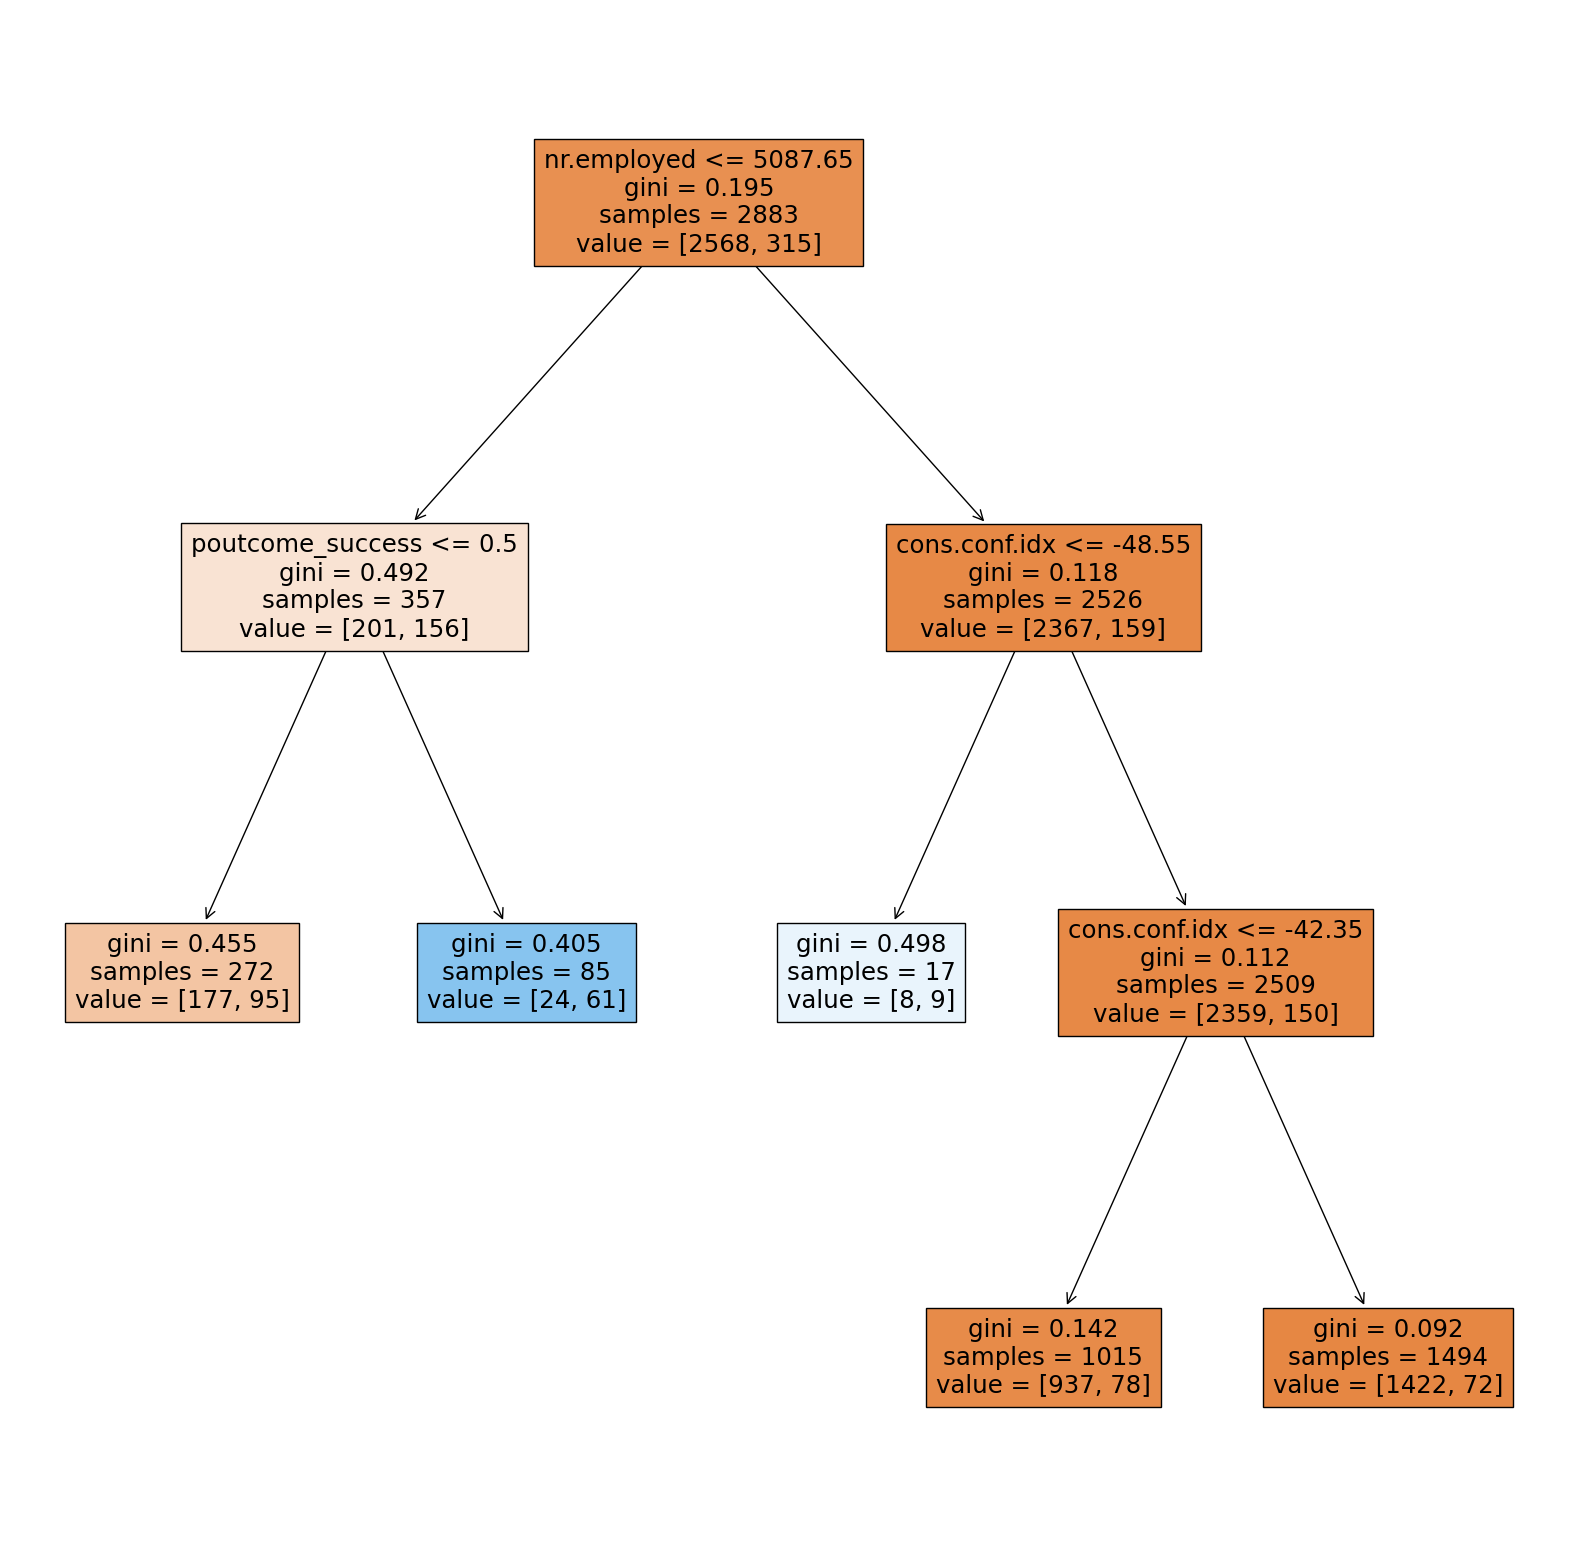

In [26]:
# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.linspace(1, 50, 50, dtype='int16'),
    'min_samples_split': np.linspace(0.1, 1.0, 10),
}

gs = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='gini', random_state=seed), 
    param_grid=param_grid)

# Fir
gs.fit(X=X_train, y=y_train)

# Predicting the test set
y_pred = gs.predict(X_test)
plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

In [27]:
# Accuracy of the test set
gs.score(X=X_test, y=y_test)

0.901294498381877

In [28]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 0.1}

In [29]:
# Print 4dp of each feature importance 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_
# See the following for an explanation, but note this a regression example so uses MSE rather than GINI
# https://towardsdatascience.com/feature-importance-in-decision-trees-e9450120b445
for i in range(len(gs.best_estimator_.feature_names_in_)):
    print(f"{gs.best_estimator_.feature_names_in_[i]}: {gs.best_estimator_.feature_importances_[i]:.4f}")

age: 0.0000
previous: 0.0000
emp.var.rate: 0.0000
cons.price.idx: 0.0000
cons.conf.idx: 0.0743
euribor3m: 0.0000
nr.employed: 0.7708
is_default: 0.0000
is_housing: 0.0000
is_loan: 0.0000
treated: 0.0000
marital_divorced: 0.0000
marital_married: 0.0000
marital_single: 0.0000
poutcome_failure: 0.0000
poutcome_nonexistent: 0.0000
poutcome_success: 0.1548
education_basic.4y: 0.0000
education_basic.6y: 0.0000
education_basic.9y: 0.0000
education_high.school: 0.0000
education_illiterate: 0.0000
education_professional.course: 0.0000
education_university.degree: 0.0000


### 9) Run a LASSO model

In [30]:
#LASSO
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [31]:
# Here we use a scikit-learn pipeline, incorporating a standard scaler, rather than just the Lasso estimator
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',Lasso())
])

In [32]:
search = GridSearchCV(pipeline,
    {'model__alpha':np.arange(0.1,10,0.1)},
    cv = 2, scoring="neg_mean_squared_error")

In [33]:
_ = search.fit(X_train,y_train)

In [34]:
search.best_params_

{'model__alpha': 0.1}

In [35]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [36]:
importance = np.abs(coefficients)

In [37]:
importance

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.57763743e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.33673694e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [38]:
np.array(X.columns)[importance > 0]

array(['nr.employed', 'treated'], dtype=object)

In [39]:
np.array(X.columns)[importance == 0]

array(['age', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'is_default', 'is_housing',
       'is_loan', 'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype=object)